## Data Preprocessing

1. Imports

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../utils/")
from preprocessing_functions import nan_replace_df
from plots import boxplot


2. Loading the dataset

In [ ]:
data = pd.read_csv("../data/synthetic_liver_cancer_dataset.csv")

categorical_vars = ["gender", "alcohol_consumption", "smoking_status", "physical_activity_level"]
for col in categorical_vars:
    data[col] = data[col].astype("category")

data.head(10)

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,Female,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,Female,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,Female,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,Male,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,Male,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1
5,37,Female,23.1,Regular,Never,0,0,50.8,0.75,0,0,Moderate,0,0
6,50,Male,19.4,Regular,Current,0,0,68.3,0.31,1,0,Moderate,0,0
7,68,Male,15.4,Regular,Former,0,0,70.8,40.18,0,0,High,0,0
8,48,Male,27.4,Occasional,Former,0,0,70.2,4.36,0,0,Low,0,0
9,52,Male,26.2,Occasional,Never,1,0,48.8,8.91,0,1,High,0,0


3. Data info

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      5000 non-null   int64   
 1   gender                   5000 non-null   category
 2   bmi                      5000 non-null   float64 
 3   alcohol_consumption      5000 non-null   category
 4   smoking_status           5000 non-null   category
 5   hepatitis_b              5000 non-null   int64   
 6   hepatitis_c              5000 non-null   int64   
 7   liver_function_score     5000 non-null   float64 
 8   alpha_fetoprotein_level  5000 non-null   float64 
 9   cirrhosis_history        5000 non-null   int64   
 10  family_history_cancer    5000 non-null   int64   
 11  physical_activity_level  5000 non-null   category
 12  diabetes                 5000 non-null   int64   
 13  liver_cancer             5000 non-null   int64   
dtypes: categ

**!! There are no null values in the dataset, so we do not need to remove any records.**

However, for demonstration purposes, we will show how to handle missing values.

4. Nan replacement

In [33]:
nan_replace_df(data)
data.isna().sum()

age                        0
gender                     0
bmi                        0
alcohol_consumption        0
smoking_status             0
hepatitis_b                0
hepatitis_c                0
liver_function_score       0
alpha_fetoprotein_level    0
cirrhosis_history          0
family_history_cancer      0
physical_activity_level    0
diabetes                   0
liver_cancer               0
dtype: int64

5. Statistic Analysis

In [34]:
data.describe()

,age,bmi,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,diabetes,liver_cancer
count,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,25.90464,0.15120,0.095800,65.203900,15.109424,0.301600,0.241400,0.199200,0.217800
std,15.799224,5.10520,0.35828,0.294346,14.875477,15.196809,0.458998,0.427975,0.399439,0.412792
min,30.000000,8.10000,0.00000,0.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,22.50000,0.00000,0.000000,54.800000,4.357500,0.000000,0.000000,0.000000,0.000000
50%,57.000000,25.90000,0.00000,0.000000,65.200000,10.340000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,29.30000,0.00000,0.000000,75.200000,21.010000,1.000000,0.000000,0.000000,0.000000
max,84.000000,43.70000,1.00000,1.000000,115.700000,136.800000,1.000000,1.000000,1.000000,1.000000


6. Handling outliers

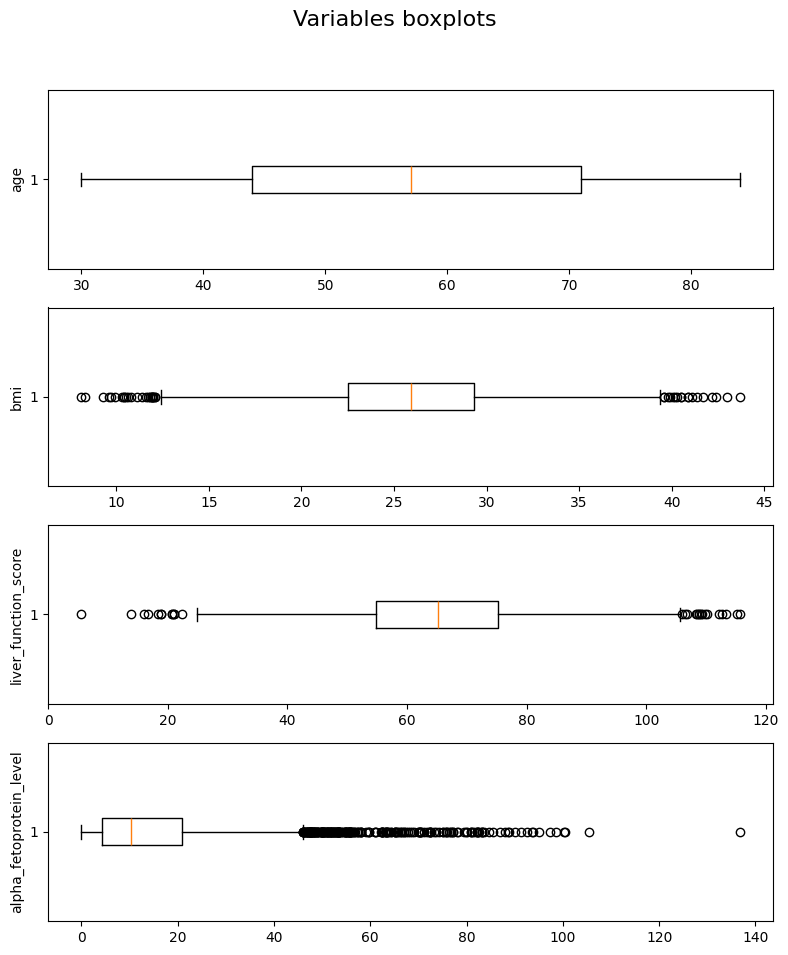

In [35]:
num_data = data[['age', 'bmi', 'liver_function_score', 'alpha_fetoprotein_level']]
boxplot(num_data)

Based on the boxplots:

- **Age**: Values are within expected range (30–85). No true outliers - we keep them. 

- **BMI**: Extremes are clinically plausible - we keep them.  

- **Liver Function Score**: Very low/high values reflect real conditions - we keep them.  

- **AFP**: Highly skewed with large extremes. We keep all values, but add a log-transformed version (*log_afp*) for linear models.  



7. Addinf log_afp

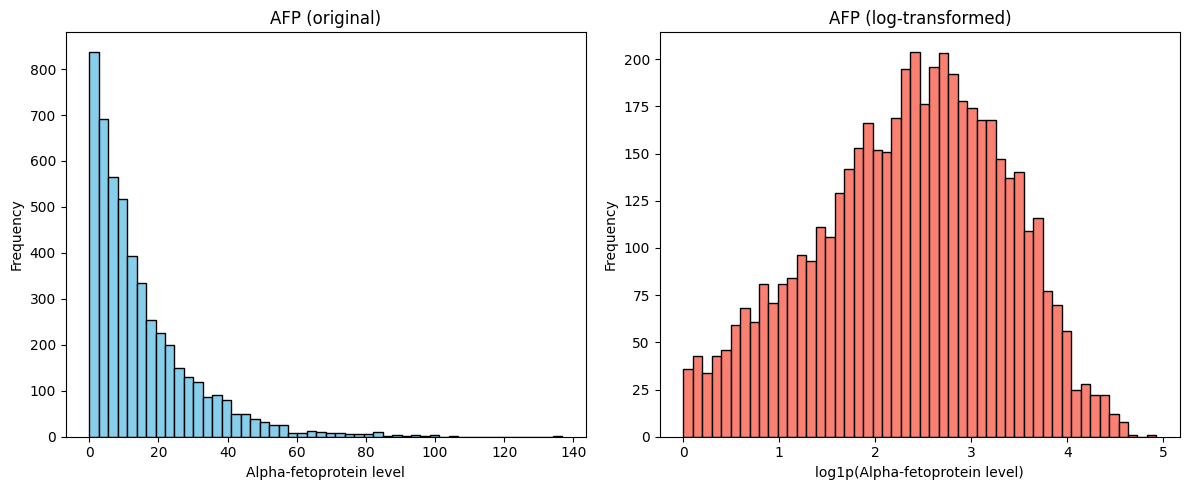

In [36]:
data["log_afp"] = np.log1p(data["alpha_fetoprotein_level"])
data[["alpha_fetoprotein_level", "log_afp"]].head()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(data["alpha_fetoprotein_level"], bins=50, color="skyblue", edgecolor="black")
axes[0].set_title("AFP (original)")
axes[0].set_xlabel("Alpha-fetoprotein level")
axes[0].set_ylabel("Frequency")

axes[1].hist(data["log_afp"], bins=50, color="salmon", edgecolor="black")
axes[1].set_title("AFP (log-transformed)")
axes[1].set_xlabel("log1p(Alpha-fetoprotein level)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

*We can see that the skewness has been drastically reduced, and the distribution is now much more centered.*

8. Checking corelation

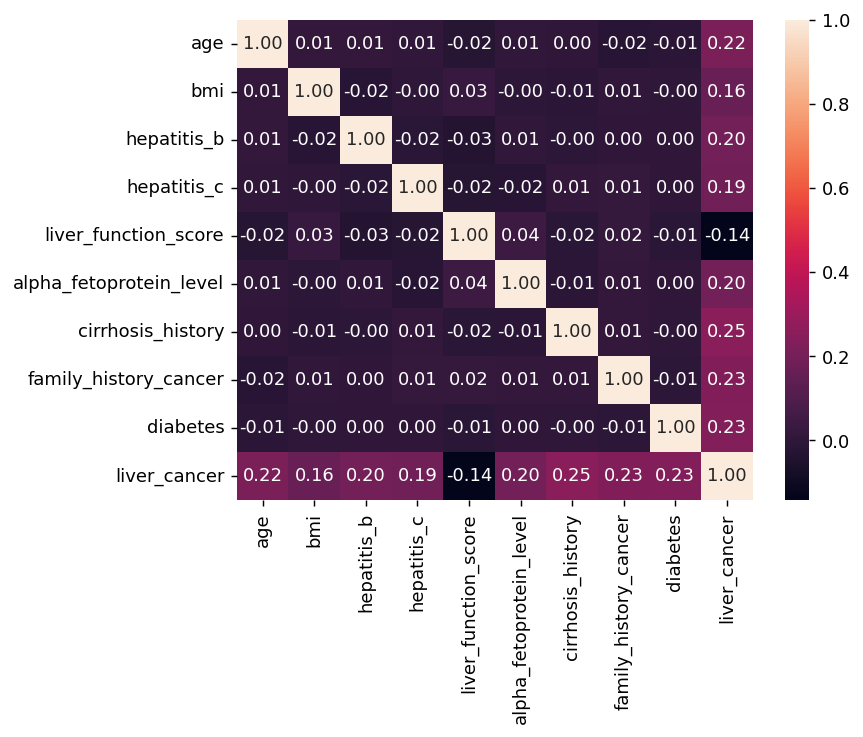

In [ ]:
corr = data.corr(method="spearman", numeric_only=True)
plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

There are no significant correlation between variables.

9. Categorical vs. Target representation

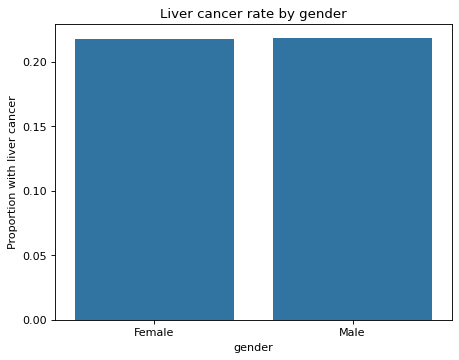

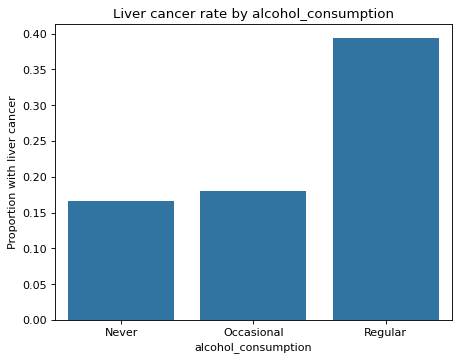

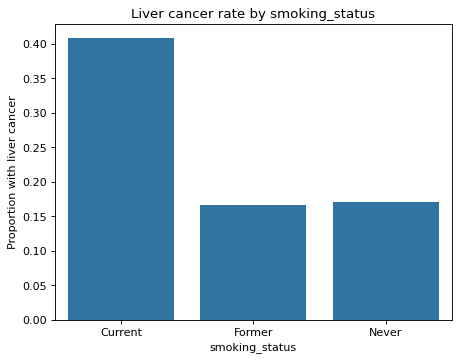

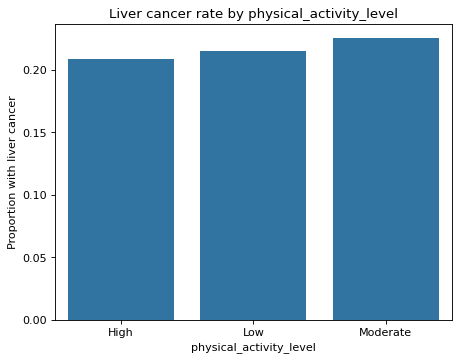

In [ ]:
categorical_vars = ["gender", "alcohol_consumption", "smoking_status", "physical_activity_level"]

for col in categorical_vars:
    plt.figure(dpi=80)
    sns.barplot(
        data=data,
        x=col,
        y="liver_cancer",
        estimator="mean",
    )
    plt.title(f"Liver cancer rate by {col}")
    plt.ylabel("Proportion with liver cancer")
    plt.xlabel(col)
    plt.show()